<a href="https://colab.research.google.com/github/NzungizeL/Single_Cell_Lung_Carcinoma/blob/master/NSCLC_tumor_scRNA_seq_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Transcriptome analysis has been widely used to make biomarker panels to diagnose cancers. Using transcriptomic datasets from 10X genomics, we tested for an association between expression and marker genes such as CD79A,CD14,NKG7,CST3,AIF1,FOXA1,PPT2,ZFP36L1,AFF4,ANTXR2,HDAC8 and VKORC1.We identified MALAT1 as the highest expression gene, which was associated with Lung Adenocarcinoma. 

*   We will investigate clustering of single-cell data from 10x Genomics, such as preprocessing, clustering and the identification of cell types via known marker genes using Scanpy.
*   We analyze a dataset of 5’ gene expression data from a fresh surgical resection of a squamous non-small cell lung carcinoma tumor.
*   The Single Cell Immune Profiling Dataset have been processed by the cellranger 2.2.0 pipeline from 10X to extract a unique molecular identifier (UMI) count matrix
*   dataset of 7,802 cells, with 1,442 median genes per cell and 4,197 median UMI counts per cell detected.



 *   **Machine Learing** is all about predictions,classifiation, regression, forecasting, clustering,and association models.



# Create directory

In [ ]:
!mkdir data1  
!wget https://cf.10xgenomics.com/samples/cell-vdj/2.2.0/vdj_v1_hs_nsclc_5gex/vdj_v1_hs_nsclc_5gex_filtered_gene_bc_matrices.tar.gz -O data1/vdj_v1_hs_nsclc_5gex_filtered_gene_bc_matrices.tar.gz
!cd data1/; tar -xzf vdj_v1_hs_nsclc_5gex_filtered_gene_bc_matrices.tar.gz
!mkdir write1

--2020-09-11 08:17:18--  https://cf.10xgenomics.com/samples/cell-vdj/2.2.0/vdj_v1_hs_nsclc_5gex/vdj_v1_hs_nsclc_5gex_filtered_gene_bc_matrices.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43818911 (42M) [application/x-tar]
Saving to: ‘data1/vdj_v1_hs_nsclc_5gex_filtered_gene_bc_matrices.tar.gz’

data1/vdj_v1_hs_nsc 100%[===================>]  41.79M  23.2MB/s    in 1.8s    

2020-09-11 08:17:21 (23.2 MB/s) - ‘data1/vdj_v1_hs_nsclc_5gex_filtered_gene_bc_matrices.tar.gz’ saved [43818911/43818911]



In [ ]:
ls -l

total 12
drwxr-xr-x 3 root root 4096 Sep 11 08:17 data1/
drwxr-xr-x 1 root root 4096 Aug 27 16:39 sample_data/
drwxr-xr-x 2 root root 4096 Sep 11 08:17 write1/


In [ ]:
#print working directory
pwd

In [ ]:
#list of direcotry in pwd
ls -ls

In [ ]:
#list inside directory data1
ls -l data1/

In [ ]:
ls -l write1/

*   **Matrix value**s represent the number for each feature (i.e. gene; row) that are detected in each cell (column).
*  ** Cellranger creates 3 files:**
1.   **genes.tsv** :a tabular file with information about genes in 2 columns (Ensembl gene id and the gene symbol)
2.   **matrix.mtx** : a tabular file with the barcode for each cells
3.   **barcodes.tsv** :a condensed version of the count matrix

**Note:** The count matrix is therefore represented by its non-zero values. Each non-zero value is indicated by its line number (1st column), its column number (2nd column) and its value (3rd column). The first row gives indication about the number of lines, column and non-zero values.

**Note 1:** **cell counts** are determined by the number of unique cellular barcodes detected [link](https://hbctraining.github.io/scRNA-seq/lessons/04_SC_quality_control.html)

In [ ]:
#extract the files from the tar archiver from the directory data1
!tar -xvf  '/content/data1/vdj_v1_hs_nsclc_5gex_filtered_gene_bc_matrices.tar.gz' -C '/content/data1'

filtered_gene_bc_matrices/
filtered_gene_bc_matrices/GRCh38/
filtered_gene_bc_matrices/GRCh38/genes.tsv
filtered_gene_bc_matrices/GRCh38/matrix.mtx
filtered_gene_bc_matrices/GRCh38/barcodes.tsv


In [ ]:
#list after extraction
ls -l data1/filtered_gene_bc_matrices/GRCh38/

In [ ]:
!pip install scanpy

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc

In [ ]:
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3             
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.10.2


In [ ]:
# save the file 
results_file = 'write1/nsclc.h5ad' 

In [ ]:
# the directory with the `.mtx` file
adata1 = sc.read_10x_mtx(
    '/content/data1/filtered_gene_bc_matrices/GRCh38',  
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... writing an h5ad cache file to speedup reading next time


In [ ]:
adata1

AnnData object with n_obs × n_vars = 7802 × 33694
    var: 'gene_ids'

**AnnData **: is the most common format used to stores the matrix as well as gene and cell annotations in a concise, compressed and extremely readable manner

# Preprocessing 

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


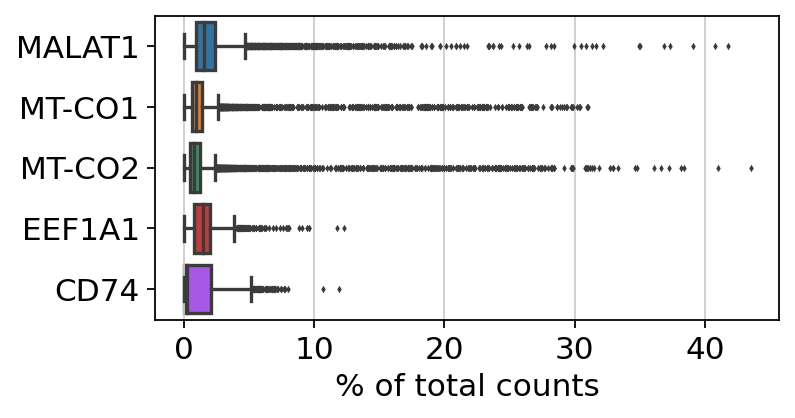

In [ ]:
#Preprocessing 
#visulaize the genes that yield the highest fraction of counts in each single cells, across all cells.
sc.pl.highest_expr_genes(adata1, n_top=5, )

*   **MALAT1** (Metastasis Associated Lung Adenocarcinoma Transcript 1) is an RNA Gene, and is affiliated with the lncRNA class.MALAT1 targeting as a novel treatment strategy against cancer. [link](https://jhoonline.biomedcentral.com/articles/10.1186/s13045-018-0606-4)
*   **MALAT1** enhances inflammatory cytokine production through sponging miR-20a and releasing TLR4[link](https://www.ncbi.nlm.nih.gov/gene/378938)
*  (MALAT1) is a recently characterized lncRNA, located on human chromosome 11q13 [link](https://www.nature.com/articles/s41419-019-1598-x)
*   **MT-CO1** gene is located from nucleotide pairs 5904 to 7444 on the guanine-rich heavy (H) section of mtDNA.[link](https://iovs.arvojournals.org/article.aspx?articleid=2677989)
*   Cytochrome c oxidase subunit I (CO1 or MT-CO1) is one of three mitochondrial DNA (mtDNA) encoded subunits (MT-CO1, MT-CO2, MT-CO3) of respiratory complex IV. [link](https://www.ncbi.nlm.nih.gov/gene/4512)
*   **MT-CO2 **is a gene with protein product which located on mitochondria. [link](https://www.sinobiological.com/resource/mtco2)
*  ** EEF1A1** (Eukaryotic Translation Elongation Factor 1 Alpha 1) is a Protein Coding gene.[link](https://www.genecards.org/cgi-bin/carddisp.pl?gene=EEF1A1)


In [ ]:
#Basic filtering
sc.pp.filter_cells(adata1, min_genes=300)
sc.pp.filter_genes(adata1, min_cells=3)

filtered out 514 cells that have less than 300 genes expressed
filtered out 13469 genes that are detected in less than 3 cells


In [ ]:
# annotate the group of mitochondrial genes as 'mt'
adata1.var['mt'] = adata1.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata1, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

**Violin plot the distribution of **: pct_counts_Mt, n_genes_by_counts and total_counts, 

# Violin plot based on computed quality measures

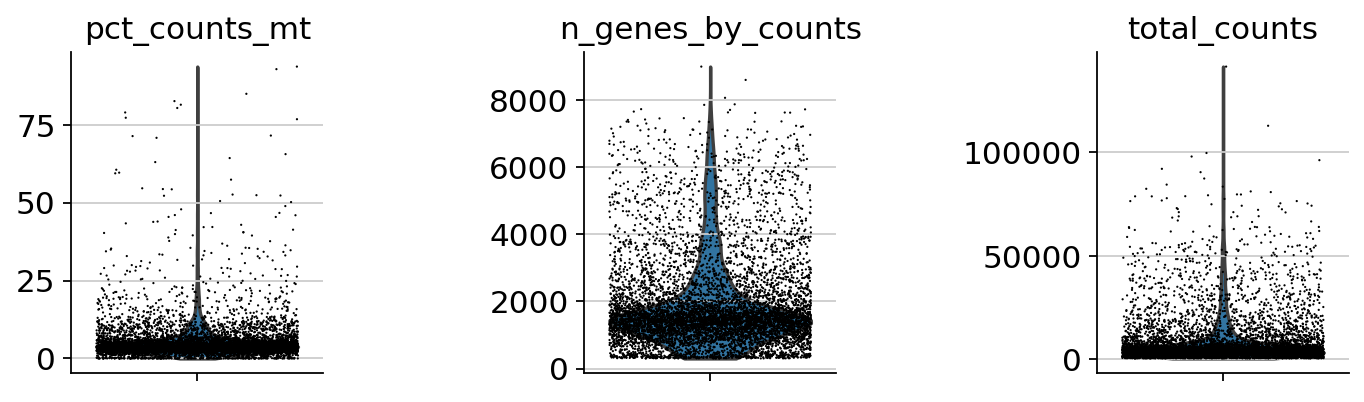

In [ ]:
#violin plot based on computed quality measures
sc.pl.violin(adata1, ['pct_counts_mt','n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)


*   pct_counts_Mt :percentage of mtRNA counts
*  pct_counts_rRNA :percentage of rRNA counts

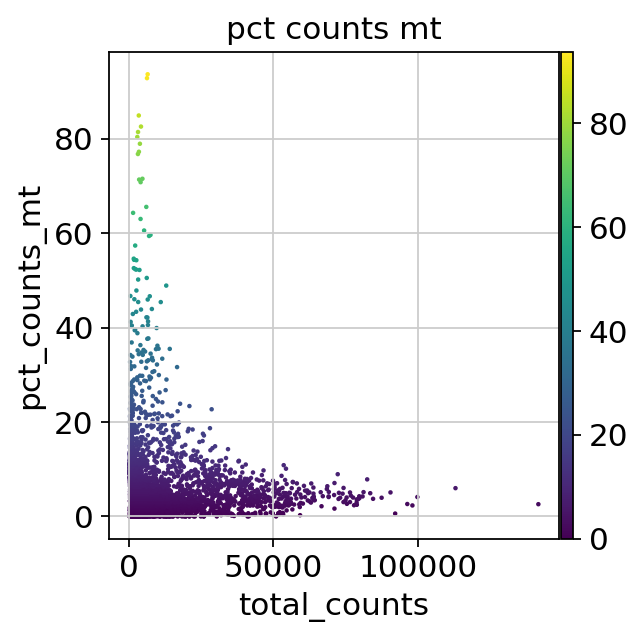

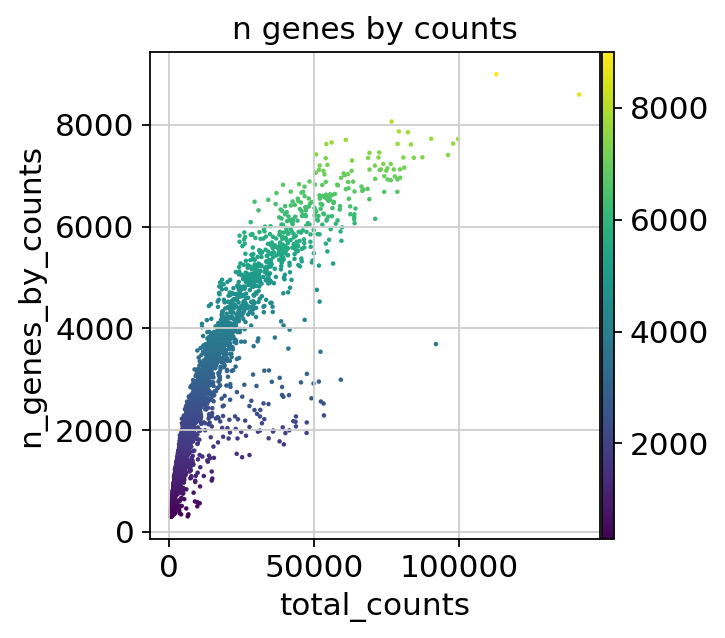

In [ ]:
#Remove cells that have too many mitochondrial genes expressed or too many total counts.
sc.pl.scatter(adata1, x='total_counts', y='pct_counts_mt',  color='pct_counts_mt')
sc.pl.scatter(adata1, x='total_counts', y='n_genes_by_counts',  color='n_genes_by_counts')

In [ ]:
#filtering by slicing the AnnData object.
adata1 = adata1[adata1.obs.n_genes_by_counts < 2000, :]
adata1 = adata1[adata1.obs.pct_counts_mt < 4, :]

# Normalization

In [ ]:
#Total-count normalize (library-size correct) the data matrix X to 10,000 reads per cell, so that counts become comparable among cells
sc.pp.normalize_total(adata1, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


**Note **: After normalization  we should calculate highly variable genes (HVGs). 
**HVG **help to explore genes that are more variable across the cells than expected given the mean expression value for that gene.

In [ ]:
#Logarithmize the data1.
sc.pp.log1p(adata1)

# Detecting Highly Variable Genes (HVG)

*   HVG discovery and allows us to detect genes which contribute strongly to cell-to-cell variation within a homogeneous cell population.[link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6781572/)
*   HVG assumes that if genes have large differences in expression across cells some of those differences are due to biological difference between the cells rather than technical noise.



In [ ]:
#Identify highly-variable genes
sc.pp.highly_variable_genes(adata1, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


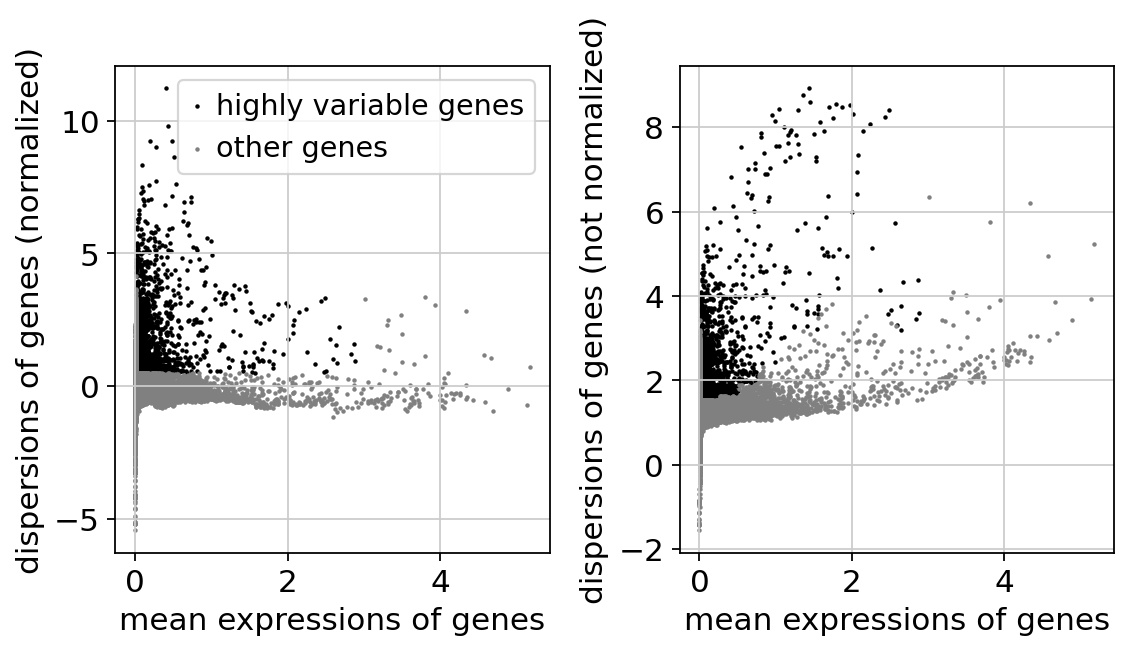

In [ ]:
#plot highly variable genes
sc.pl.highly_variable_genes(adata1)

In [ ]:
#attribute of AnnData object to the normalized and logarithmized raw gene expression for later use in differential testing and visualizations of gene expression.
adata1.raw = adata1

In [ ]:
#filtering
adata1 = adata1[:, adata1.var.highly_variable]

In [ ]:
#Scale the data to unit variance.
#Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed
sc.pp.regress_out(adata1, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:12)


In [ ]:
#Scale each gene to unit variance and Clip values exceeding standard deviation 10
sc.pp.scale(adata1, max_value=10)

# Principal component analysis (PCA)

*   **Computing PCA** means（Compute the mean for every dimension of the whole dataset， Compute the covariance matrix of the whole dataset， Compute eigenvectors and the corresponding eigenvalues）.
*   



In [ ]:
#Reduce the dimensionality of the data by running principal component analysis (PCA),
# PCA reveals the main axes of variation and denoises the data.
#sc.tl.pca(adata1,copy=True, svd_solver='auto')
sc.tl.pca(adata1, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


# Commonly used tumor marker genes


CD79A, CD14, NKG7, CST3, AIF1, FOXA1, PPT2, ZFP36L1,AFF4, ANTXR2, HDAC8, VKORC1 are affilited to the different functions in immune cells such as macrophages B cells and NK cells.

**Principal component analysis (PCA)**

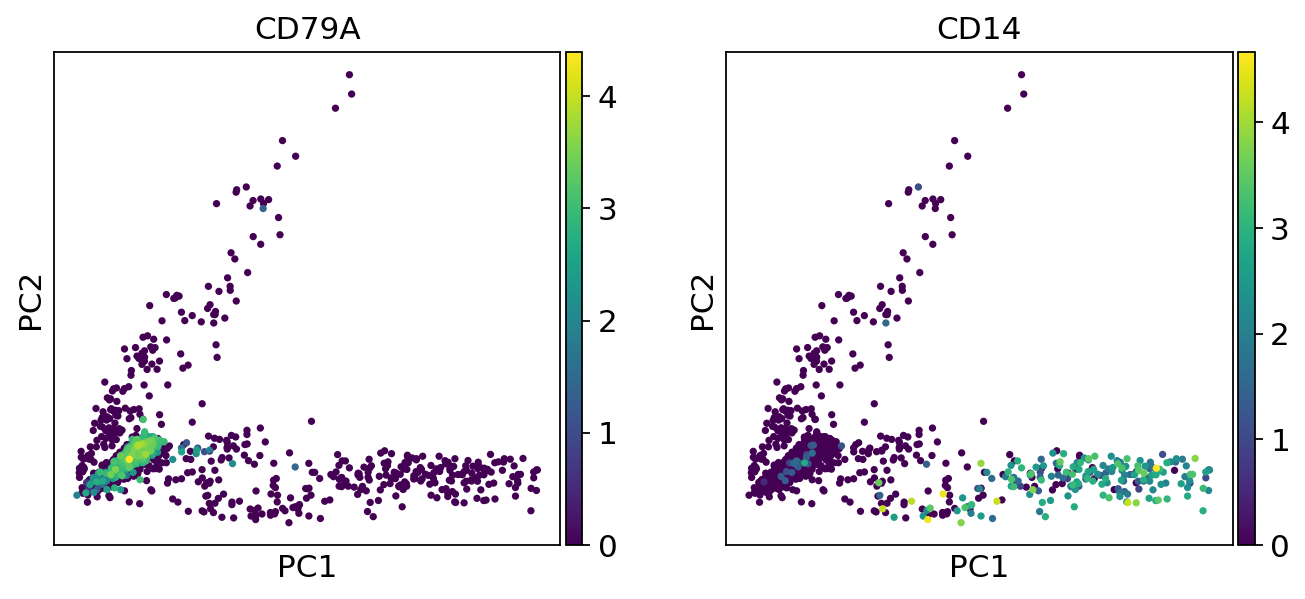

In [ ]:
#scatter plot for PCA
#sc.pl.pca(adata1, color=['CD79A','CD14','NKG7','CST3','AIF1','FOXA1','PPT2','ZFP36L1','AFF4','ANTXR2','HDAC8','VKORC1'])
sc.pl.pca(adata1, color=['CD79A','CD14'])

In [ ]:

#Shape tuple (#observations, #variables)
#Data matrix of shape (n_obs × n_vars).
adata1.shape

(2790, 2377)

**AnnData** stores a data matrix X together with annotations of observations **obs** (obsm, obsp), variables **var** (varm, varp), and **uns** (unstructured annotations).
[AnnData](https://anndata.readthedocs.io/en/stable/anndata.AnnData.html)

In [ ]:
adata1

AnnData object with n_obs × n_vars = 2790 × 2377
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

# The influence of single PCs to the total variance in the data1

* ** Q1:** How many principal components would use to capture at least 50% of the total variance in the dataset? [link](https://www.researchgate.net/post/how_many_principal_components_would_use_to_capture_at_least_50_of_the_total_variance_in_the_dataset)
*   **A1:**  You have to see the proportion of variance that each PC accounts for the variability in your data. It depends of the type of data you are analyzing, in some cases, the first PC could account for the 90% of the variance of your data.In other cases, you may need several PCs to account for the 90% of the variability of your data.
*   **A2:**Typically the first principal component PCA1 will capture more than 50% of the variation alone
[Interpretation of PCA](https://www.researchgate.net/publication/319469038_New_Interpretation_of_Principal_Components_Analysi)
*   **A3:**By default, cellranger count currently uses the top 10 principal components from the principal component analysis (PCA).
**Note: Variance ratio** helps us to know how many PCs we should consider in order to compute the neighborhood relations of cells in data1.

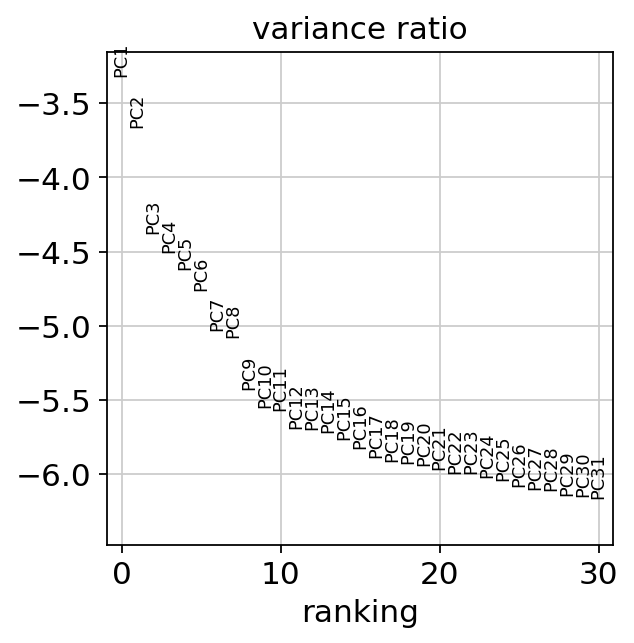

In [ ]:
#variance ratio
sc.pl.pca_variance_ratio(adata1, log=True)

*   **Q1:** What is a good level of variance?
*   **A1:** It should **not be less than 60%**. If the variance explained is 35%, it shows the data is not useful, and may need to revisit measures, and even the data collection process.

 [Choosing the number of components](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)




In [ ]:
#Save the result.
adata1.write(results_file)

**Computing the neighborhood graph via PCA**

In [ ]:
#nearest neighbors computation
sc.pp.neighbors(adata1, n_neighbors=100, n_pcs=50)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


**Visualisation**

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


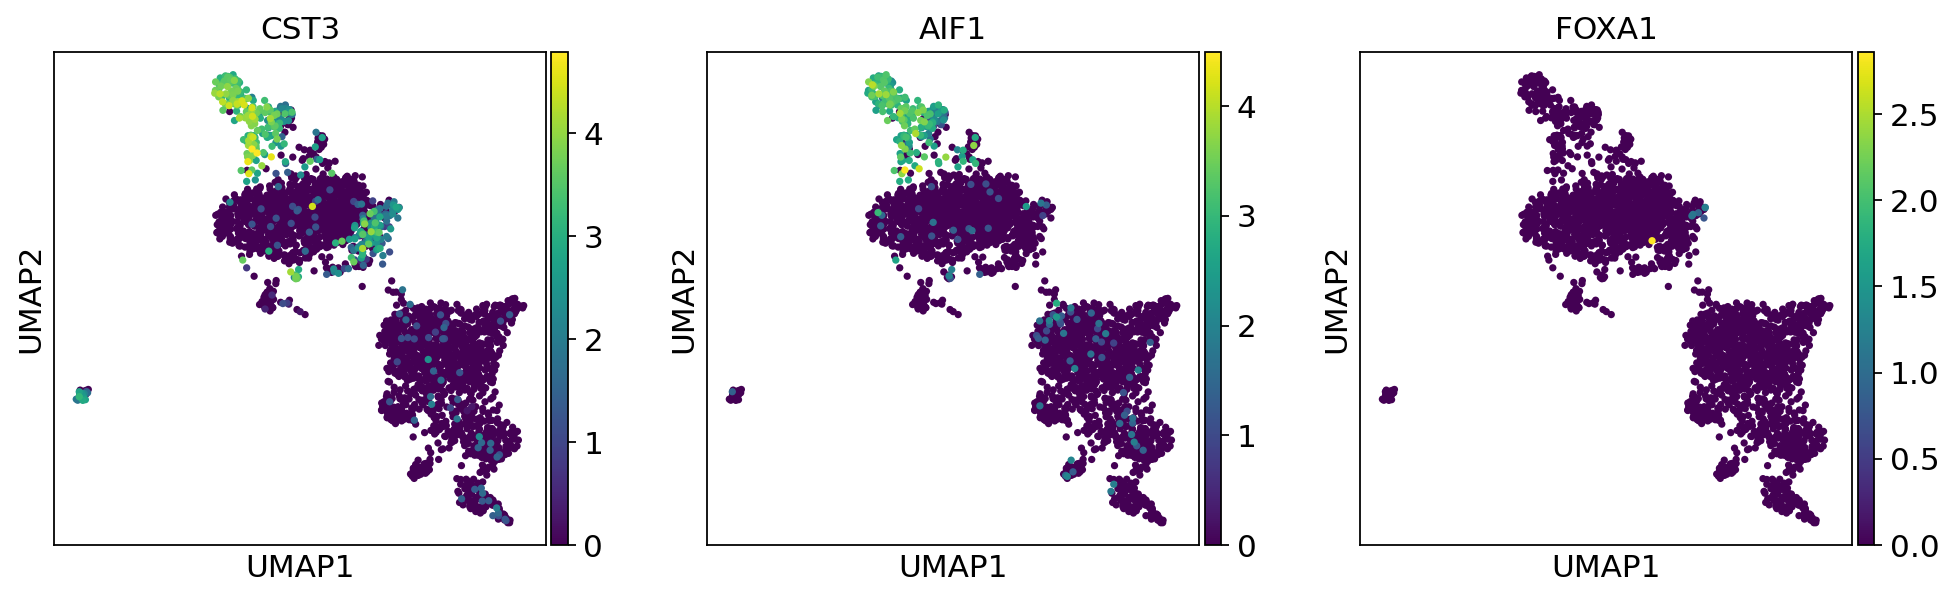

In [ ]:
#Embedding the neighborhood graph
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['CST3','AIF1','FOXA1'])

**Visualisation**

In [ ]:
!pip install MulticoreTSNE

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:24)


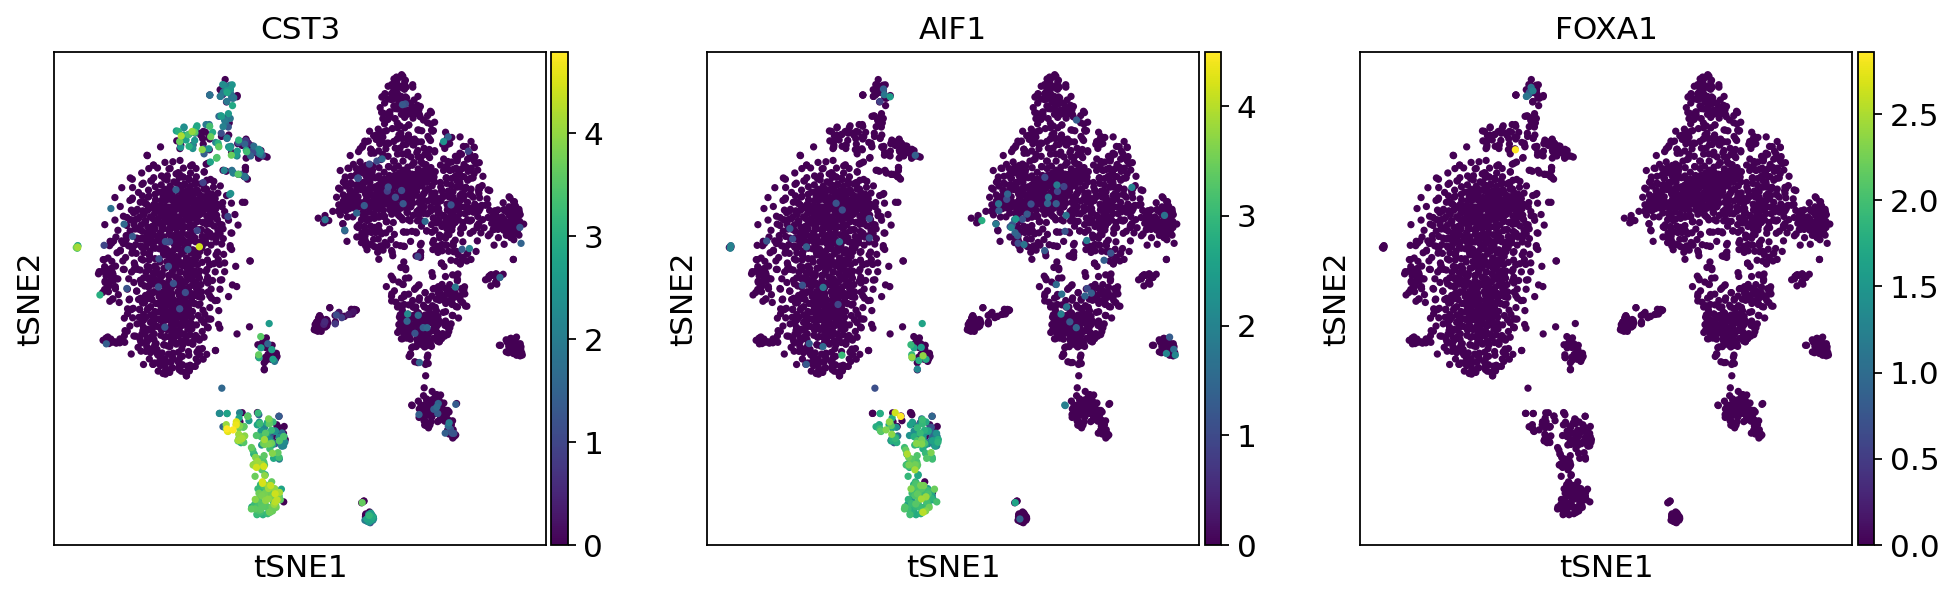

In [ ]:
sc.tl.tsne(adata1)
sc.pl.tsne(adata1, color=['CST3','AIF1','FOXA1'])

**Visualisation**

In [ ]:
#install the leiden algorithm
!pip install leidenalg

In [ ]:
#Leiden clustering directly clusters the neighborhood graph of cells, which we already computed in the previous section.
sc.tl.leiden(adata1)

running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


**Clustering with the Leiden Algorithm**
*  We performed dimensionality reduction by uniform
manifold approximation and projection (UMAP) and graph-based
clustering, which identified 12 clusters.

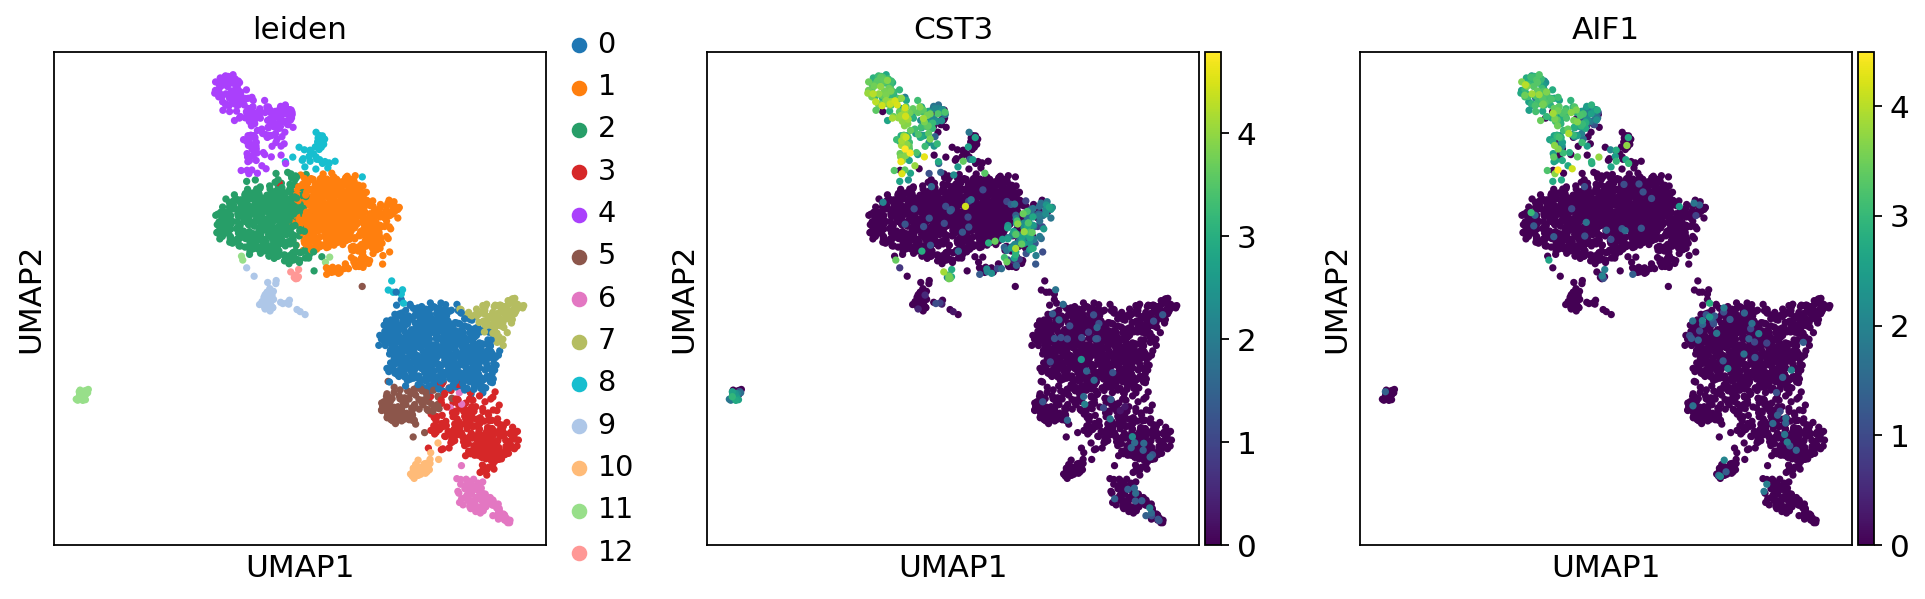

In [ ]:
#Clustering with the Leiden Algorithm 
#Plotting the clusters
sc.pl.umap(adata1, color=['leiden', 'CST3','AIF1'])

In [ ]:
#Save the result
adata1.write(results_file)

# Leiden clustering vs Louvain clustering
*   **Leiden** is both faster than** Louvain** and finds better partitions
*   **Leiden algorithm** also performs better than the **Louvain algorithm**
*    **Leiden** identifies substantially better partitions t**han Louvain**.
*   **Louvain** algorithm10 is very simple and elegant

**Graph clustering using Leiden algorithms (Visualisation)**






running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


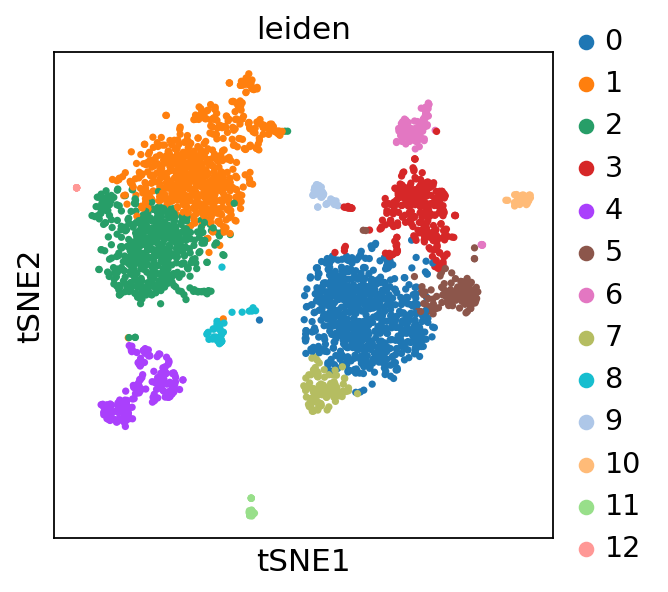

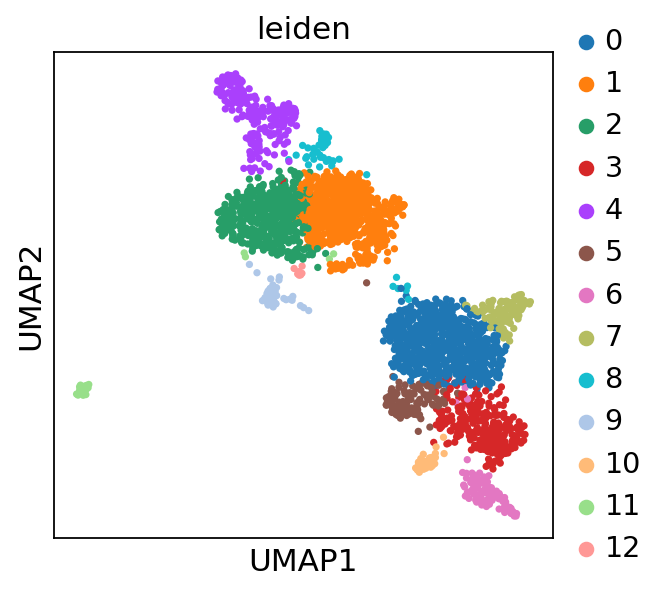

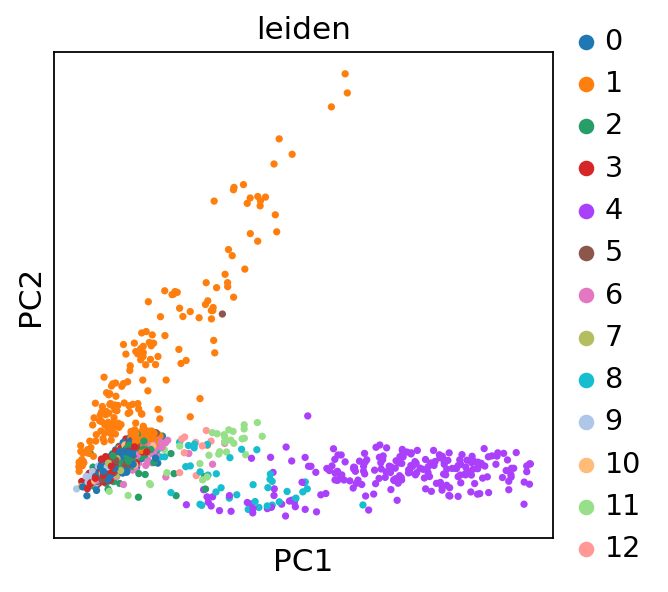

In [ ]:
sc.tl.leiden(adata1)
sc.pl.tsne(adata1, color='leiden')
sc.pl.umap(adata1, color='leiden')
sc.pl.pca(adata1, color='leiden')

In [ ]:
#Save the result
adata1.write(results_file)

**Dimensionality Reduction for Clustering**
*  non-linear dimensional reduction (UMAP and tSNE)
*  linear dimensional reduction (PCA)



**Finding marker genes**(compare each cluster with others)


*   Discovering marker genes in scRNA differential expression and 
*   computing a highly ranking differential genes in each cluster



**t-test**
*   We calculated each cluster’s most highly differentially expressed (DE) genes to manually annotate clusters with their respective cellular identities.




ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


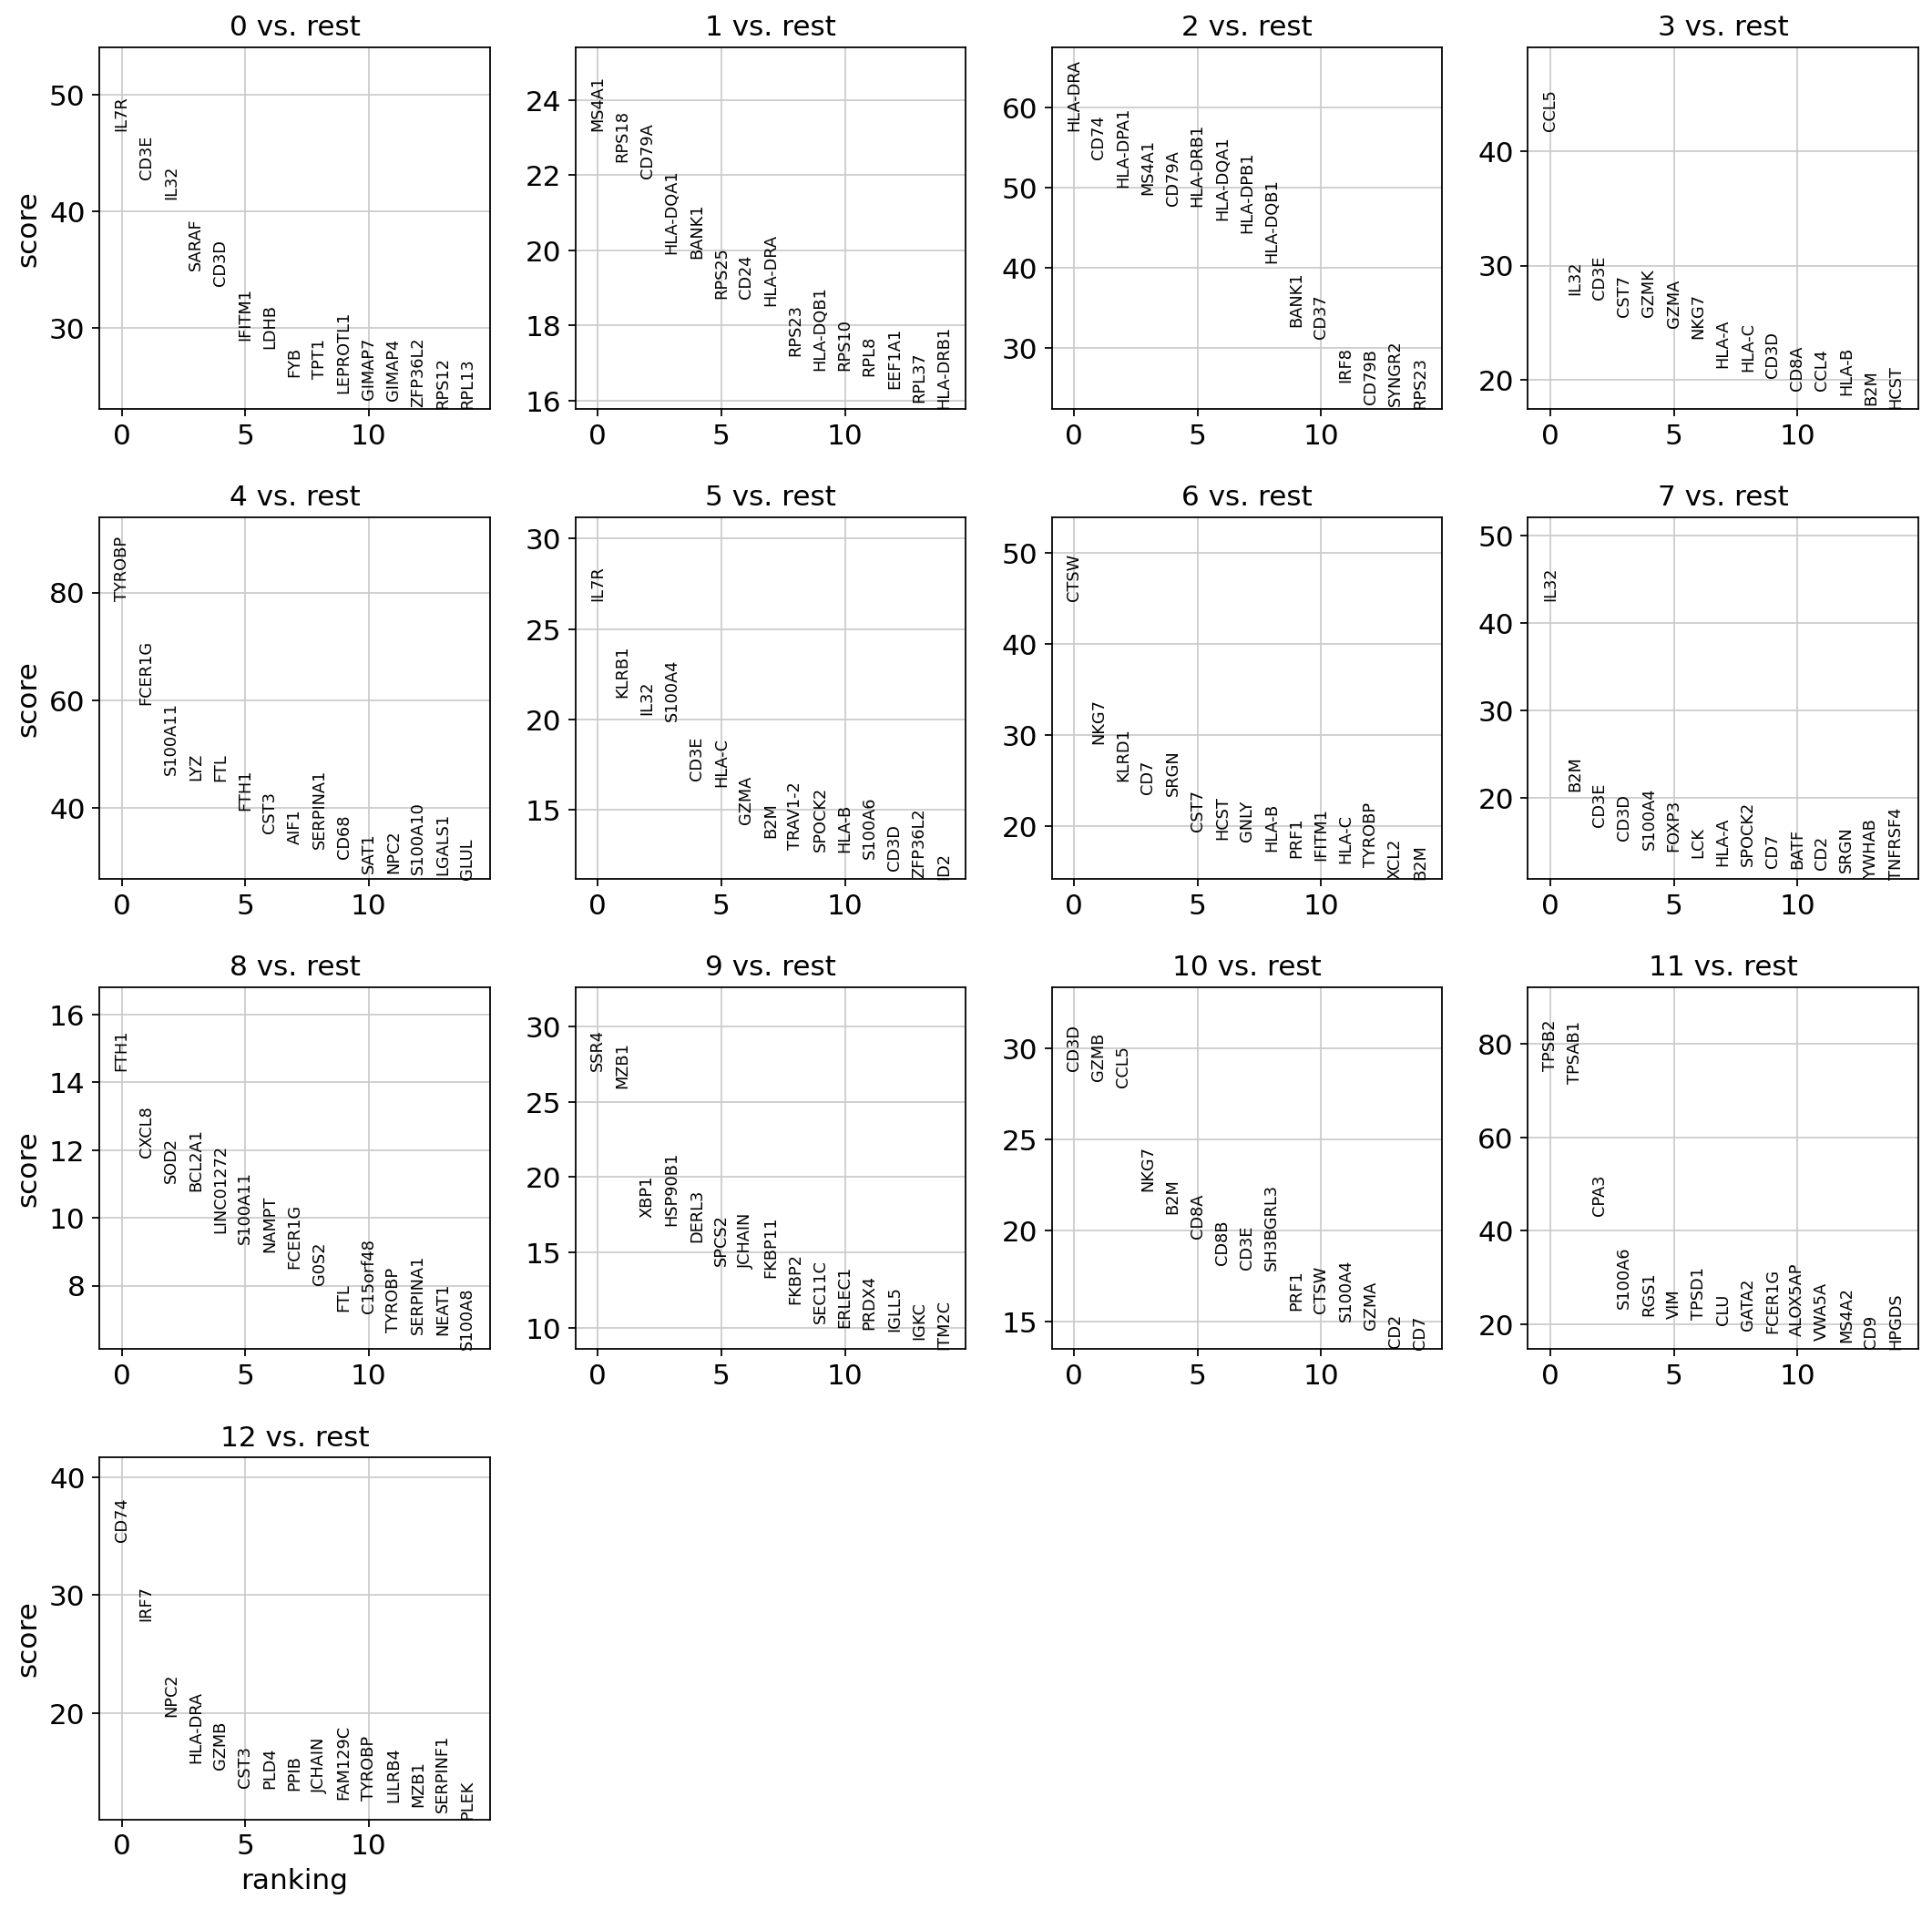

In [ ]:
#by default, use .raw attribute of AnnData in case it has been initialized before. 
#The simplest way and fast is to performe the t-test.
sc.tl.rank_genes_groups(adata1, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata1, n_genes=15, sharey=False)

In [ ]:
# reduce the verbosity
sc.settings.verbosity = 2

**Mann-Whitney-U test**
*   We calculated each cluster’s most highly differentially expressed (DE) genes to manually annotate clusters with their respective cellular identities 

ranking genes
    finished (0:00:04)


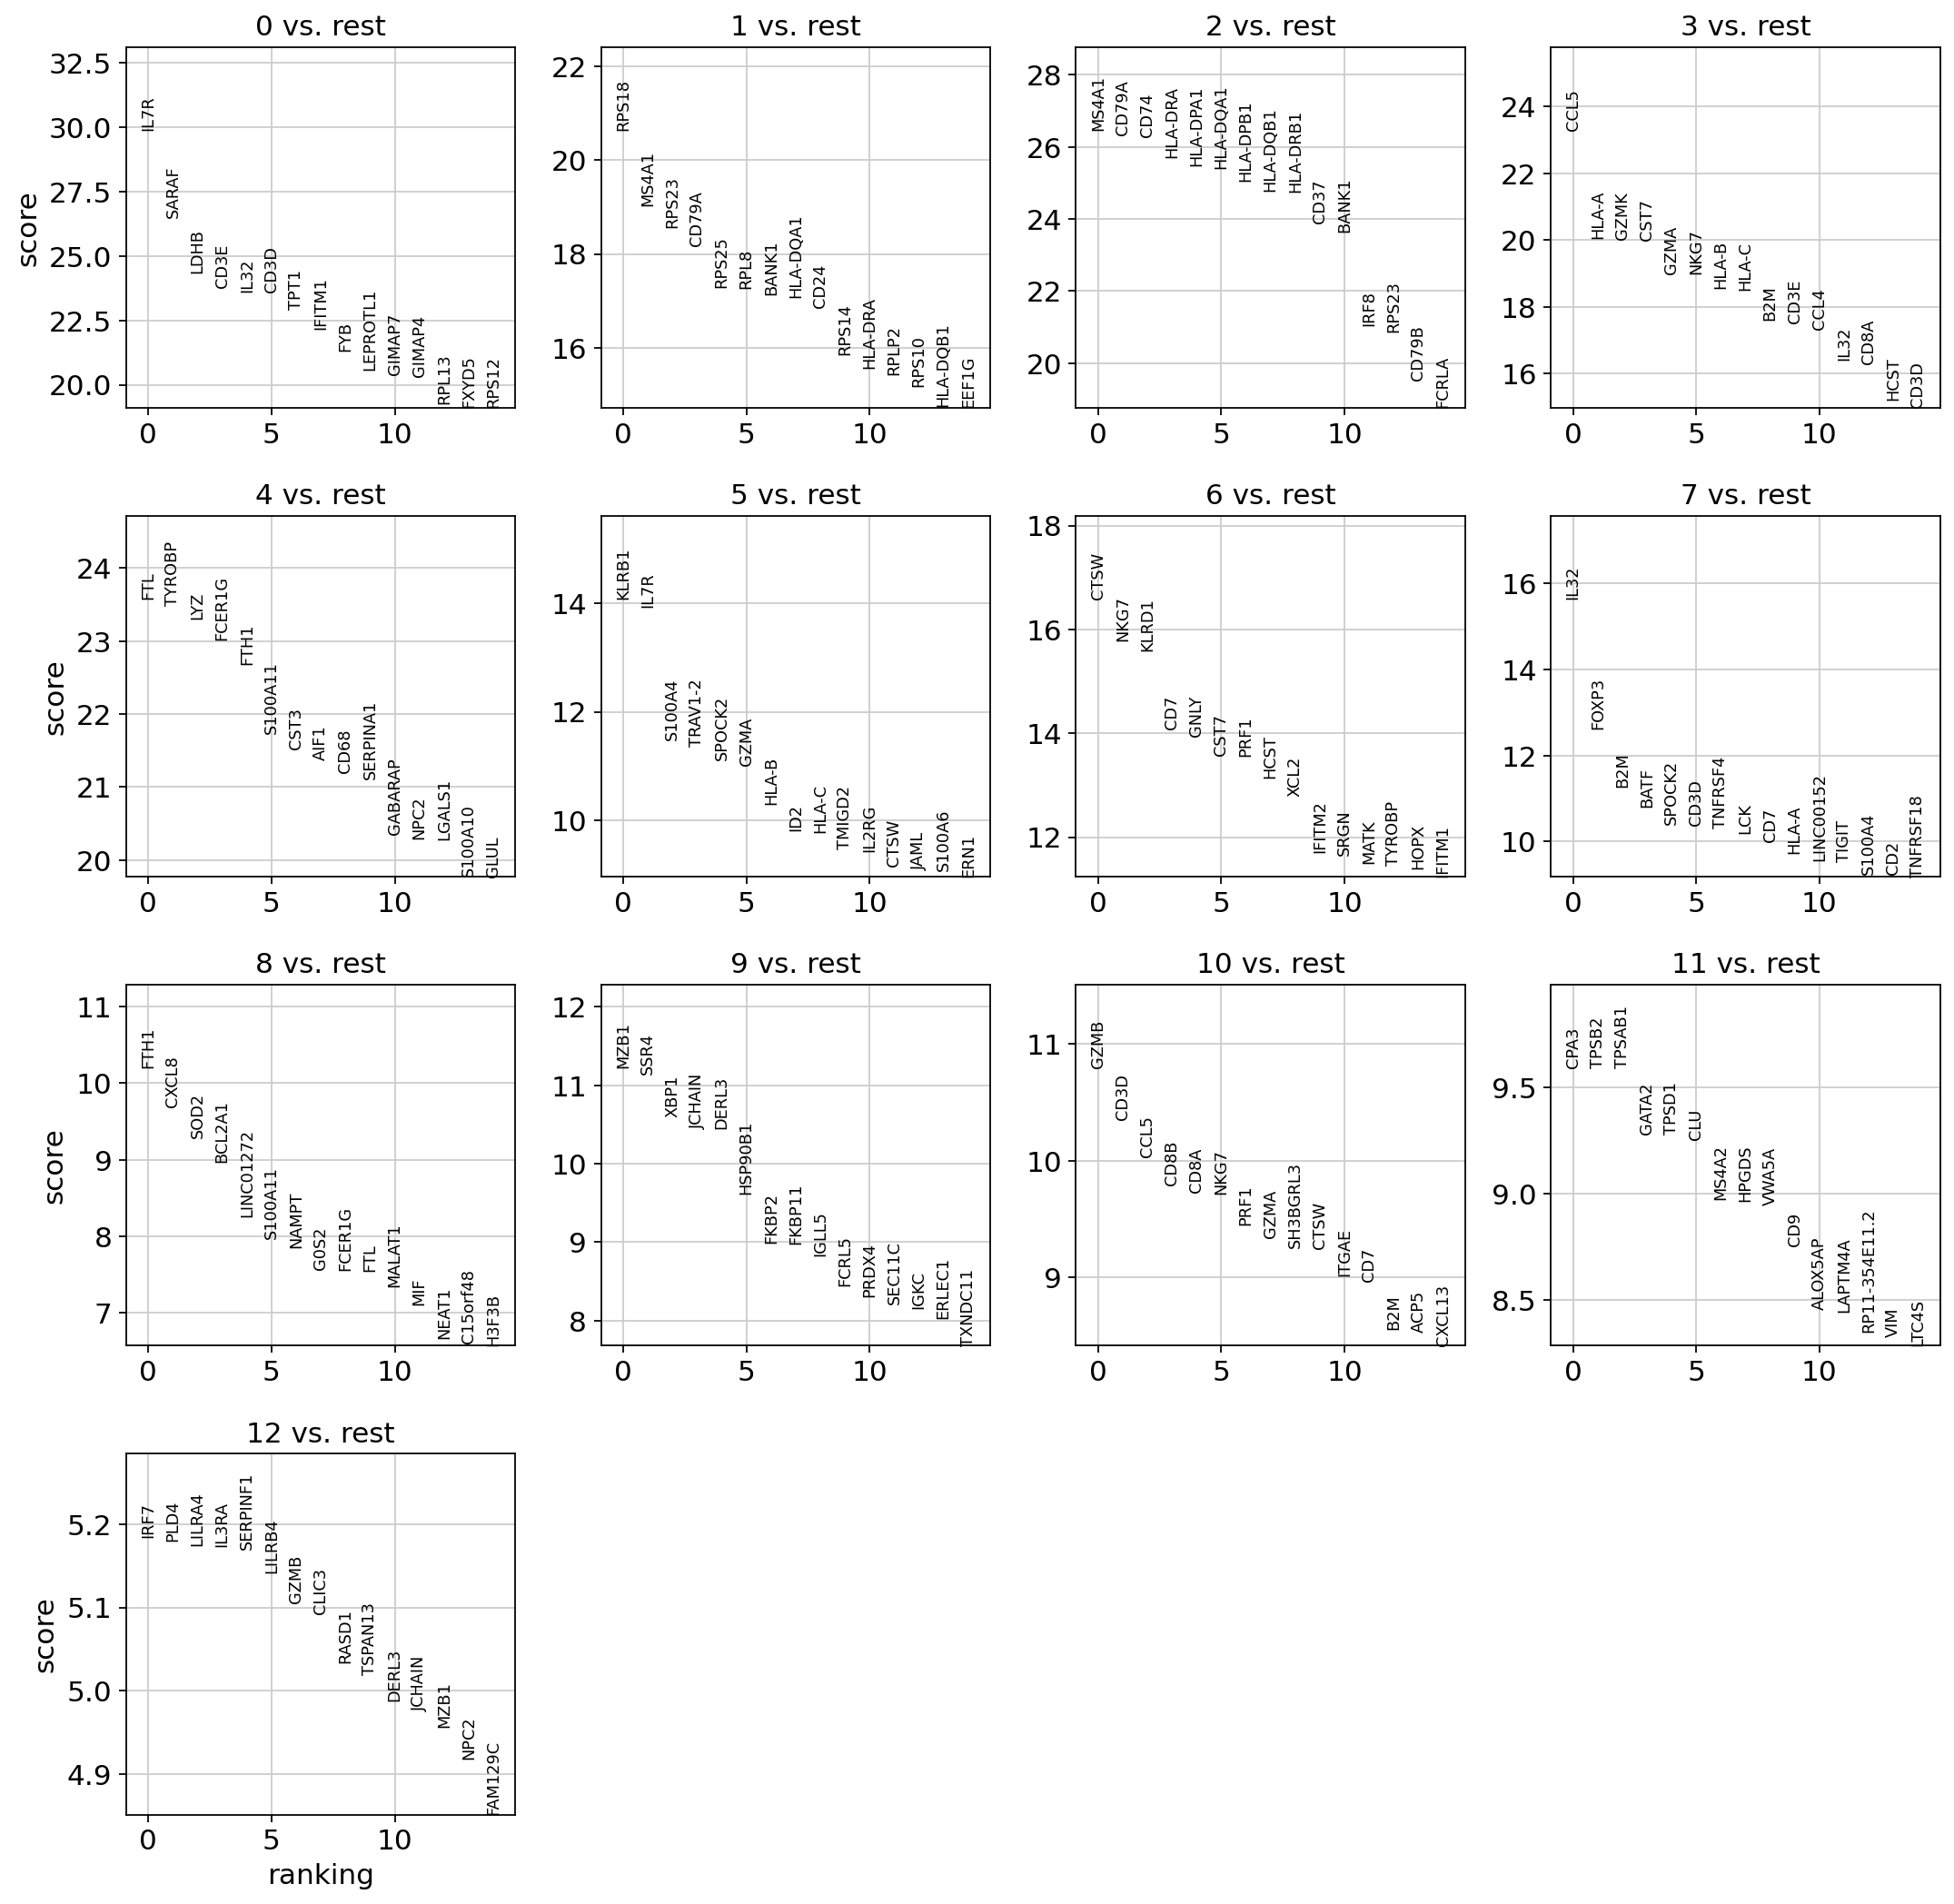

In [ ]:
#check if the results of a Mann-Whitney-U test (Wilcoxon rank-sum) is the to t-test
sc.tl.rank_genes_groups(adata1, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata1, n_genes=15, sharey=False)

**The highest rank gene in each cluster （t-test）**
*   0：IL7R
*   1：MS4A1
*   2：HLA-DRA
*   3：CCL5
*   4：TYROBP
*   5: IL7R
*   6: CTSW
*   7: IL32
*   8: TH1
*   9: SSRA
*   10：CD3D
*   11：TPSB2
*   12：CD74

**The highest rank gene in each cluster（Mann-Whitney-U test）**
*   0：IL7R
*   1：RP518
*   2：MS4A1
*   3：CCL5
*   4：FTL
*   5: KLRB1
*   6: CTSW
*   7: IL32
*   8: FTH1
*   9: MZB1
*   10： GZMB
*   11： CPA3
*   12： IRF7


In [ ]:
#Save the result.
adata1.write(results_file)

**Logistic Regression**
*   With the Logisitc Regression you can rank the genes
*   We calculated each cluster’s most highly differentially expressed (DE) genes to manually annotate clusters with their respective cellular identities 

**The two main supervised models of ML** are classifiation and regression. The
regression model is used to predict the demand of a given product in relation to
its characteristics. However, the classifiation model maps the input variables into predefied classes. 


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:00:25)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


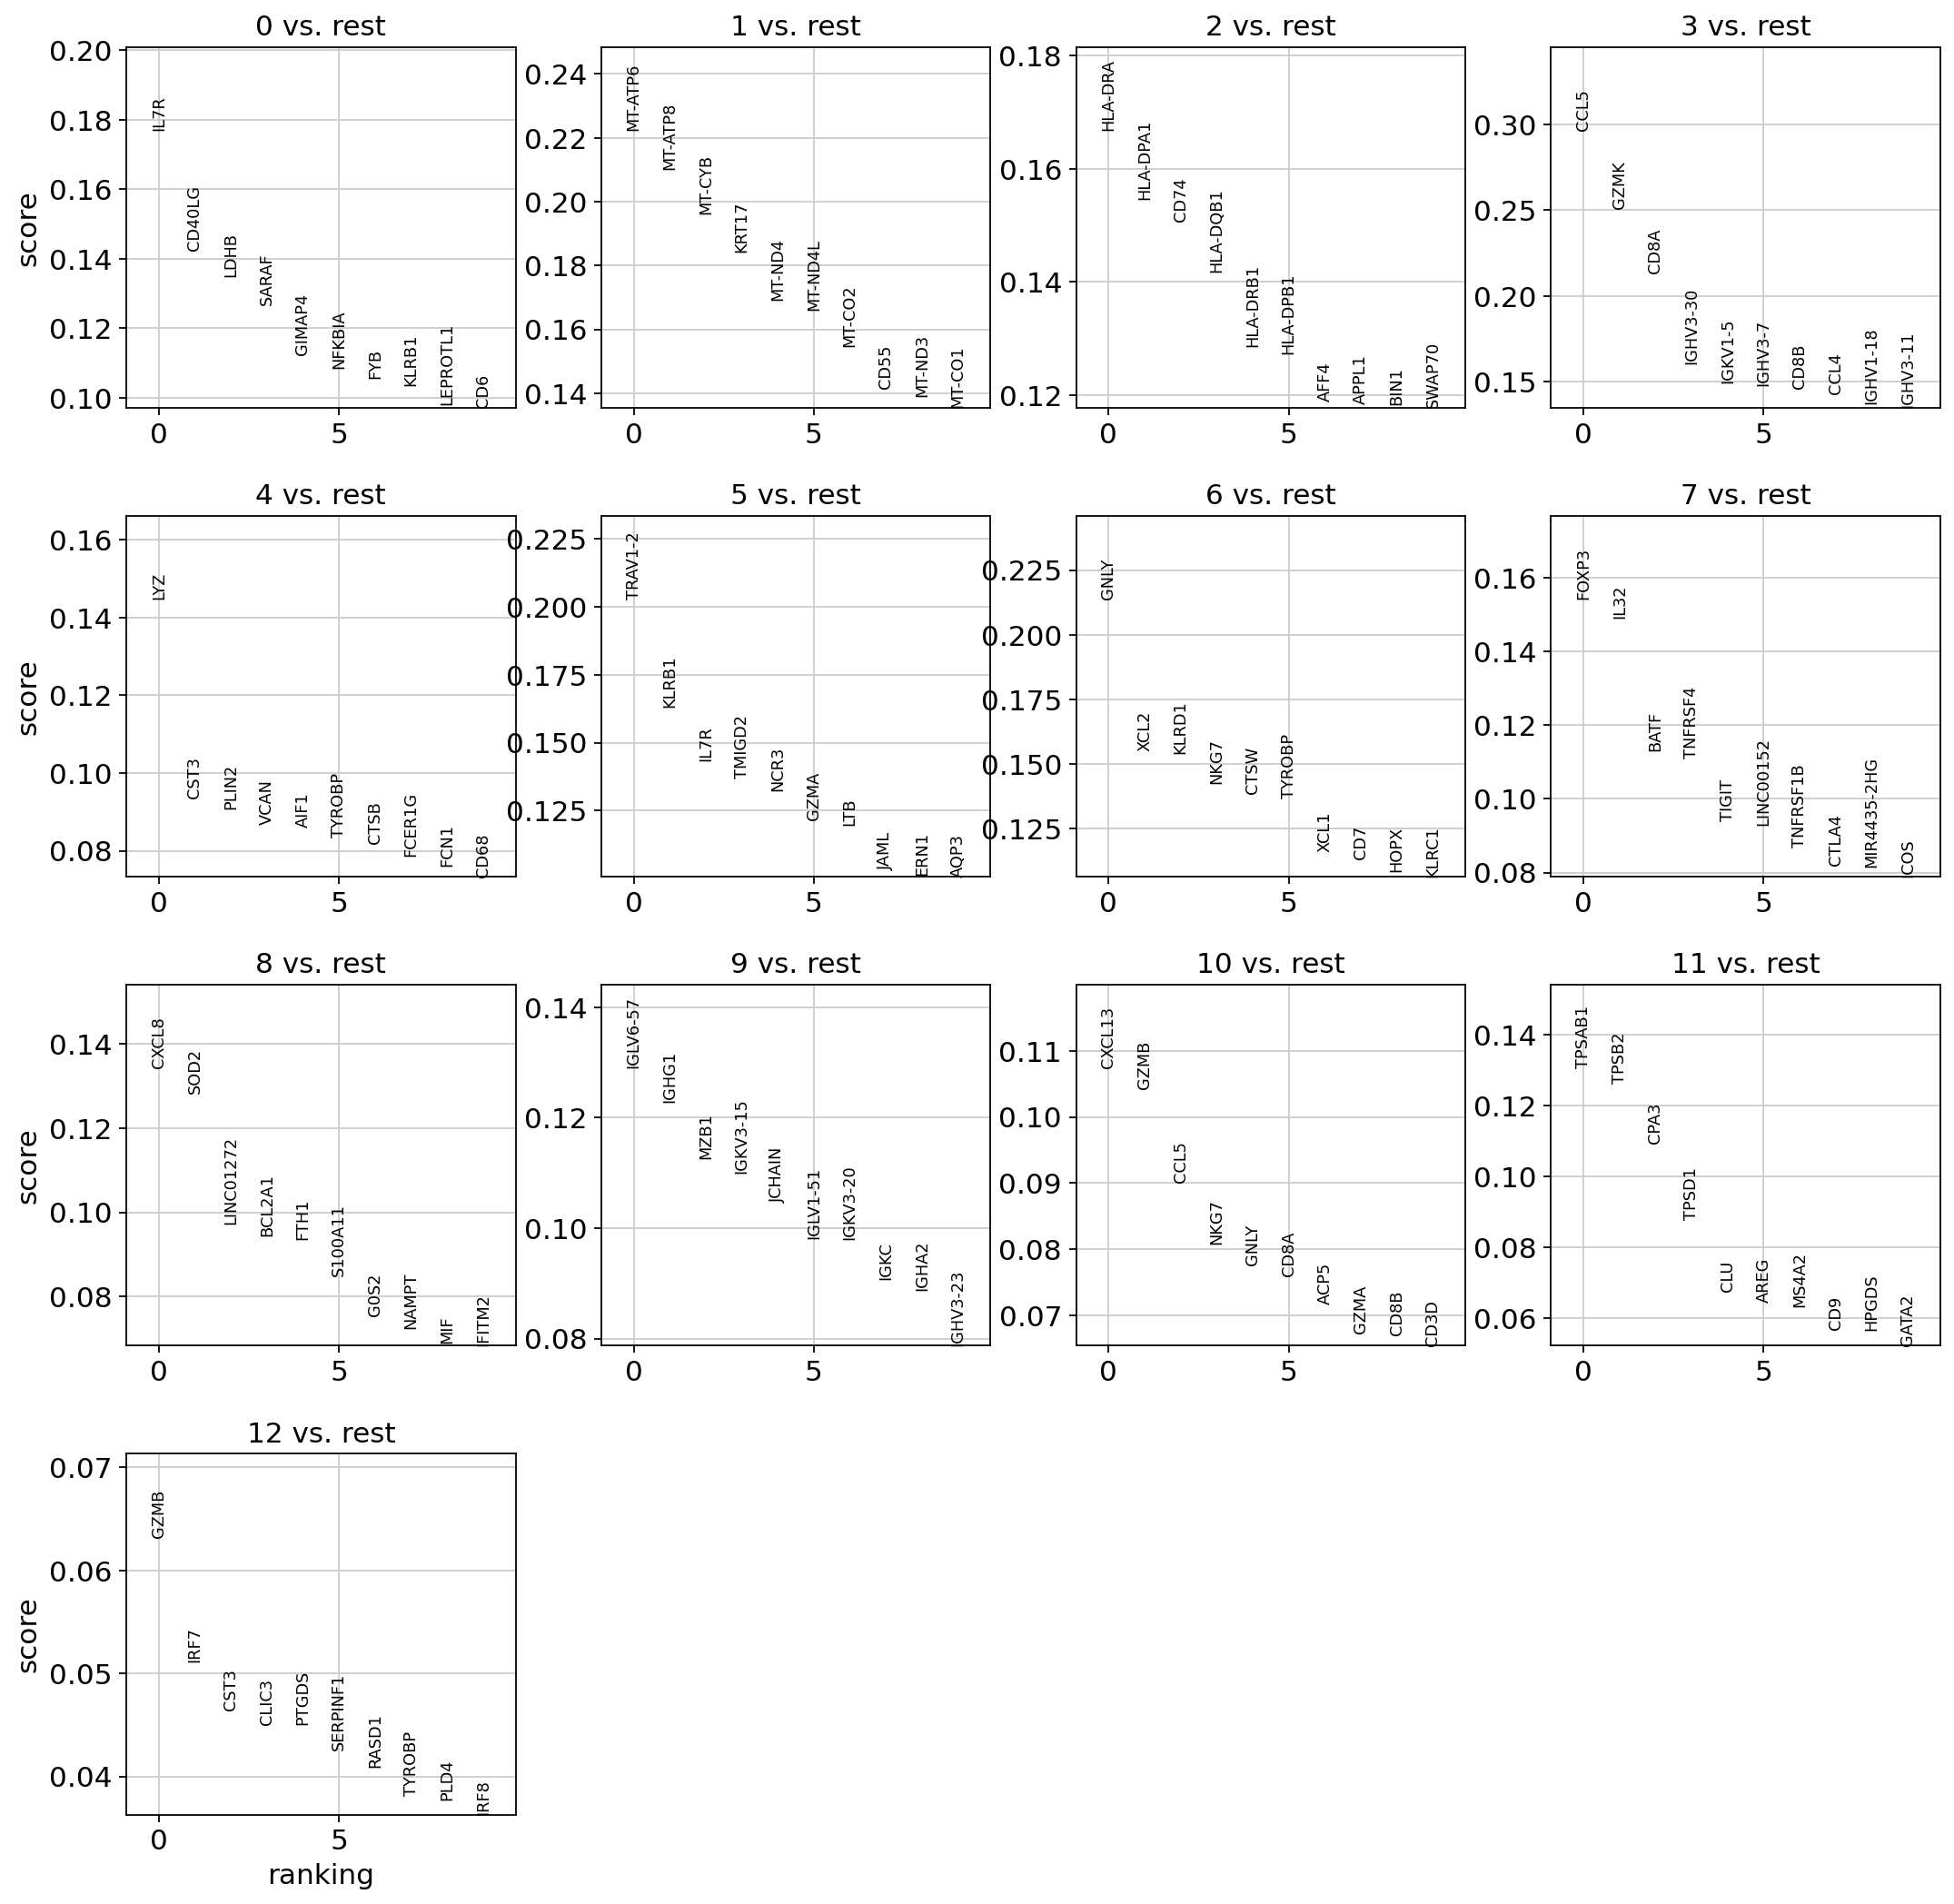

In [ ]:
#conventional differential tests are uni-variate
sc.tl.rank_genes_groups(adata1, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata1, n_genes=10, sharey=False)

**Wilcoxon test**  

*   Refers to either the Rank Sum test or the Signed Rank test, is a nonparametric test that compares two paired groups.


ranking genes
    finished (0:00:04)


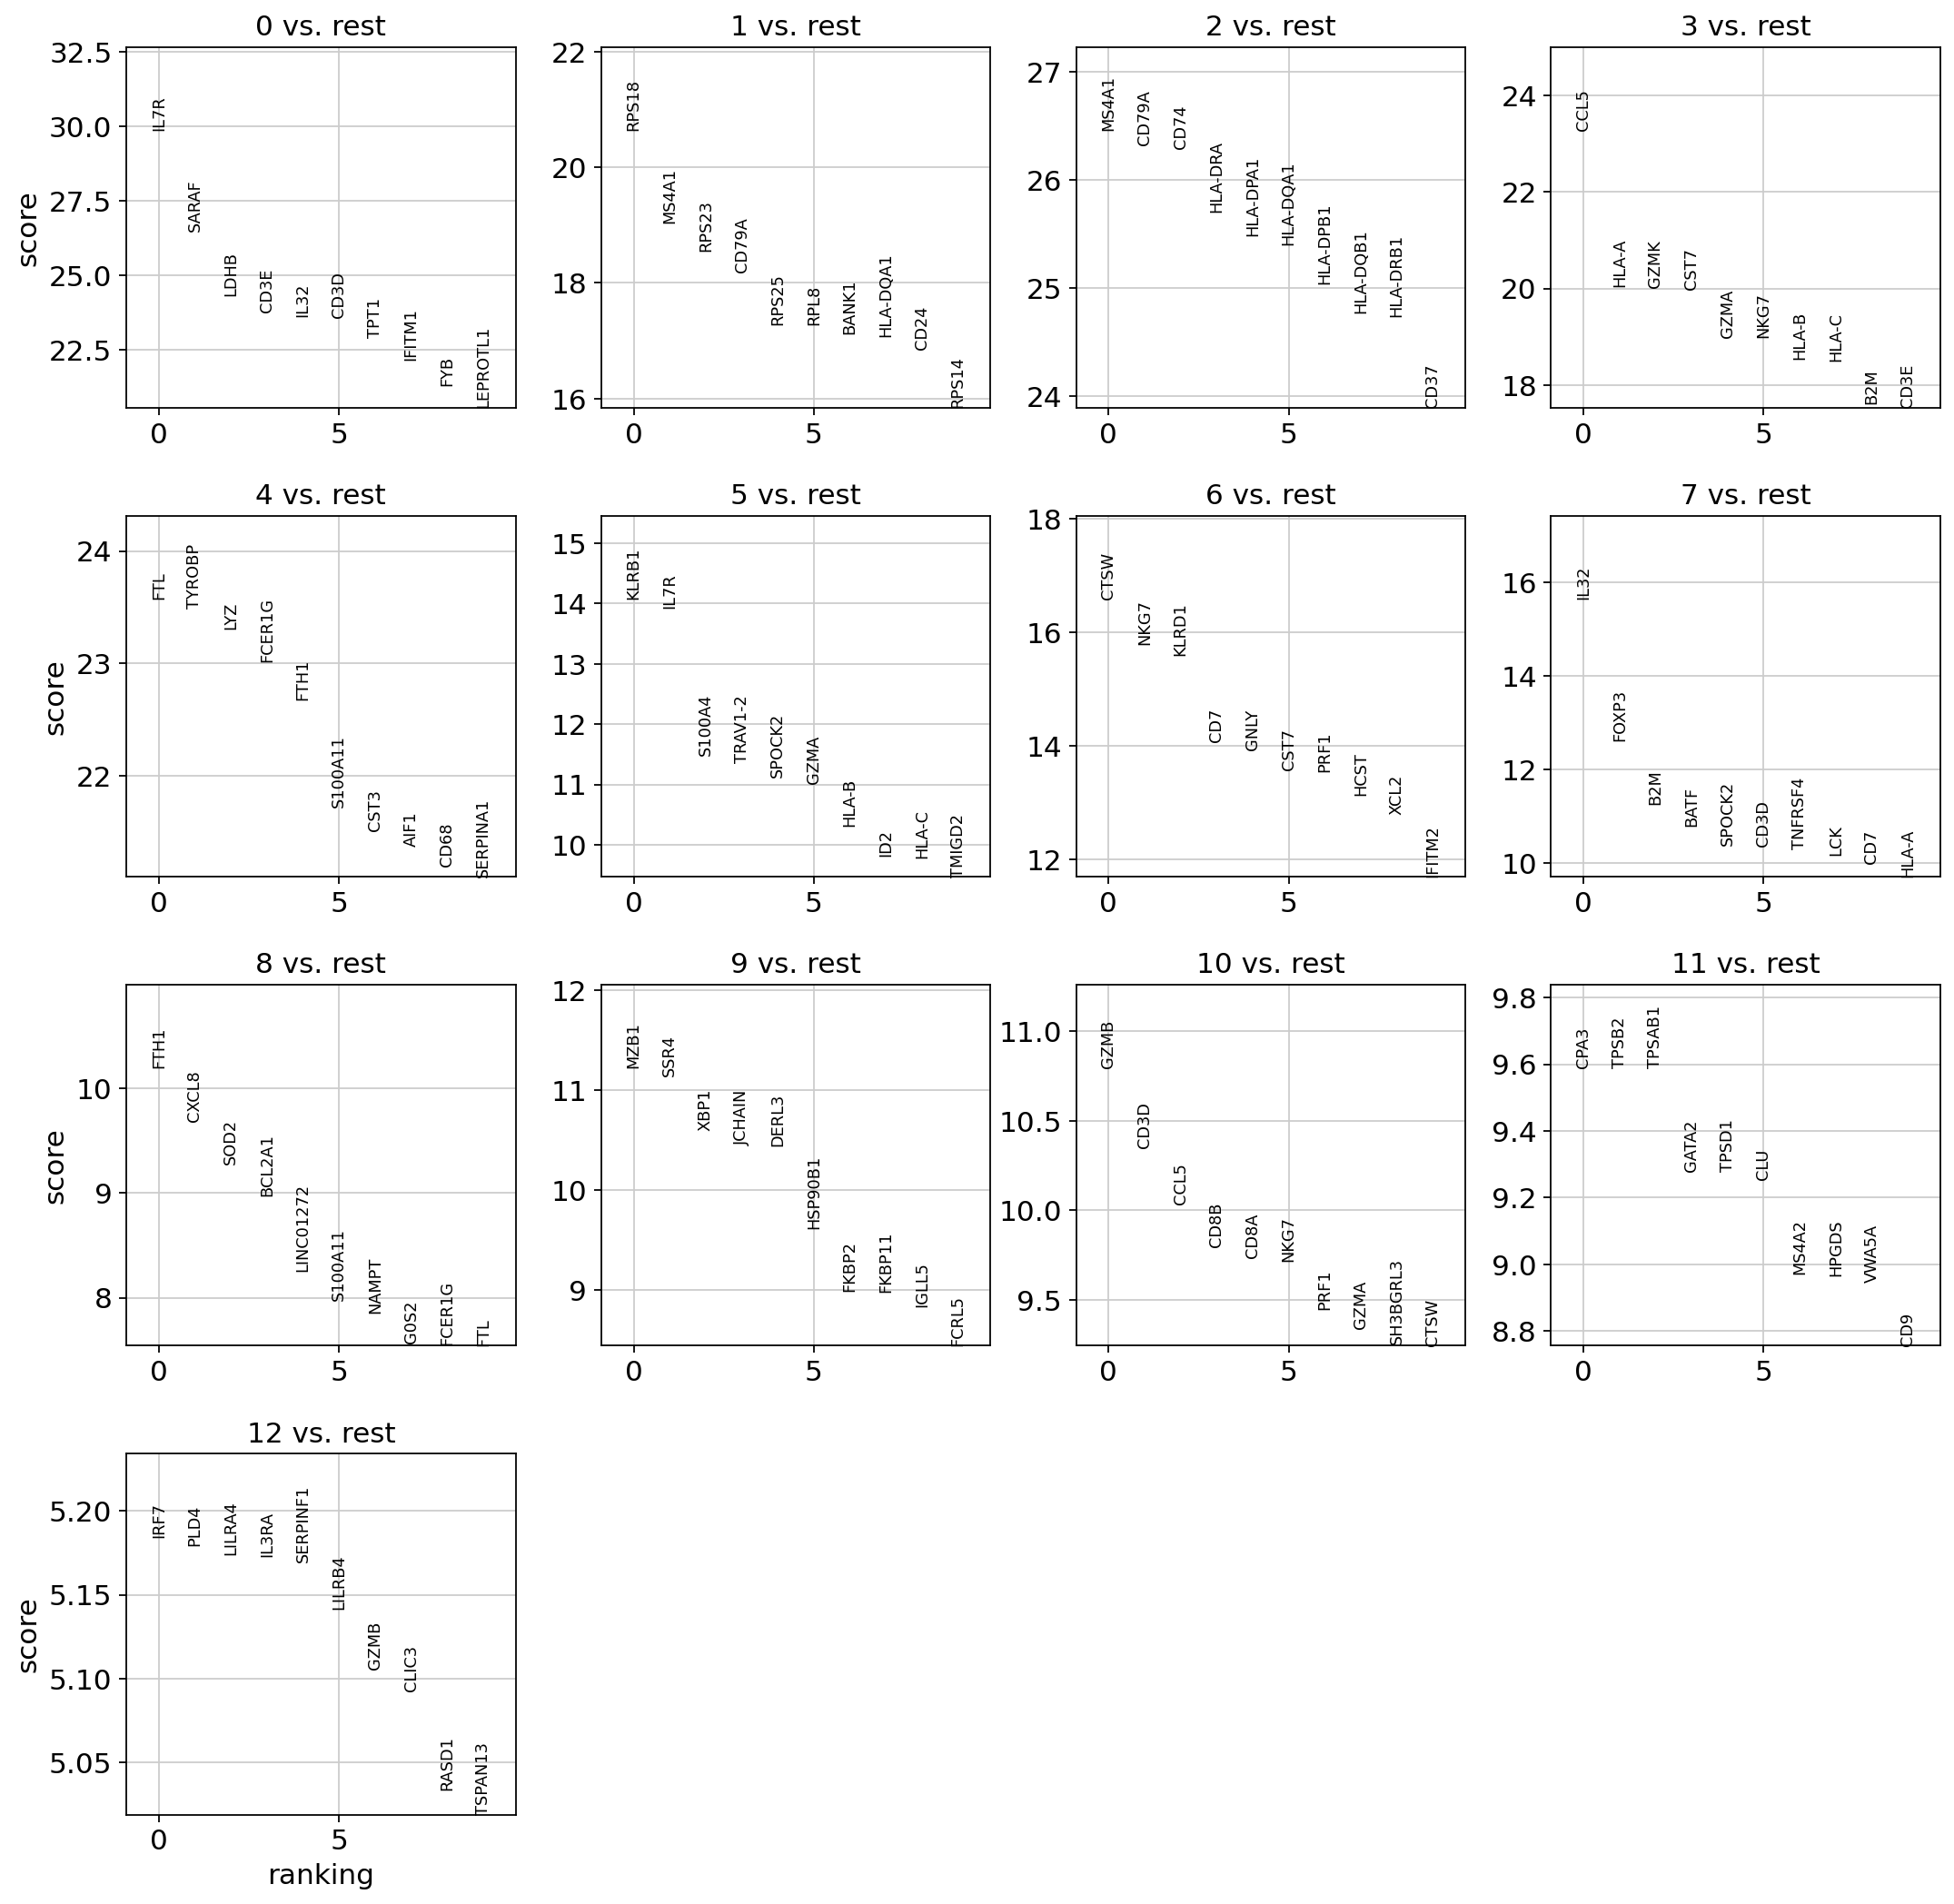

In [ ]:
sc.tl.rank_genes_groups(adata1, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata1, n_genes=10, sharey=False)

**Tumor marker:** A substance found in tissue, blood, bone marrow, or other body fluids that may be a sign of cancer or certain benign (noncancer) conditions.
*   A tumor marker may be used with other tests to help diagnose cancer
*  **Examples:**
1.  in ovarian cancer: CA-125,
2.  in breast cancer: estrogen receptor and progesterone receptor. 
3.   in colon cancer: CEA 
4.   in prostate cancer: PCA3 mRNA and PSA
5.   in non-small cell lung cancer: EGFR gene mutation


**Reference for all marker genes** [link](https://www.genecards.org/Search/Keyword?queryString=IL7R)

In [ ]:
#define a list of marker genes from the table.
marker_genes = ['IL7R','MS4A1', 'MS4A7', 'CD8A', 'FCGR3A','FCER1A','PPBP','CD79A','CD14','NKG7','CST3','AIF1','FOXA1','PPT2','ZFP36L1',
                 'AFF4','ANTXR2']


In [ ]:
#Reload the object that has been save with the Wilcoxon Rank-Sum test result
adata1 = sc.read(results_file)

In [ ]:
#Identify the 5 top ranked genes for each cluster 0-12 in a dataframe
pd.DataFrame(adata1.uns['rank_genes_groups']['names']).head(6)

0         1         2     3  ...        9    10      11       12
0    IL7R     MS4A1   HLA-DRA  CCL5  ...     SSR4  CD3D   TPSB2     CD74
1    CD3E     RPS18      CD74  IL32  ...     MZB1  GZMB  TPSAB1     IRF7
2    IL32     CD79A  HLA-DPA1  CD3E  ...     XBP1  CCL5    CPA3     NPC2
3   SARAF  HLA-DQA1     MS4A1  CST7  ...  HSP90B1  NKG7  S100A6  HLA-DRA
4    CD3D     BANK1     CD79A  GZMK  ...    DERL3   B2M    RGS1     GZMB
5  IFITM1     RPS25  HLA-DRB1  GZMA  ...    SPCS2  CD8A     VIM     CST3

[6 rows x 13 columns]

In [ ]:
#Show in a table with the scores and groups.
result = adata1.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(6)

0_n            0_p    1_n  ...          11_p      12_n          12_p
0   IL7R  5.187594e-196  RPS18  ...  8.962889e-22      IRF7  2.167713e-07
1  SARAF  1.672473e-154  MS4A1  ...  8.962889e-22      PLD4  2.226306e-07
2   LDHB  1.187655e-130  RPS23  ...  8.962889e-22    LILRA4  2.291509e-07
3   CD3E  6.676152e-125  CD79A  ...  1.714012e-20     IL3RA  2.306816e-07
4   IL32  4.196596e-123  RPS25  ...  1.719430e-20  SERPINF1  2.348119e-07
5   CD3D  6.719714e-123   RPL8  ...  2.173360e-20    LILRB4  2.729253e-07

[6 rows x 26 columns]

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


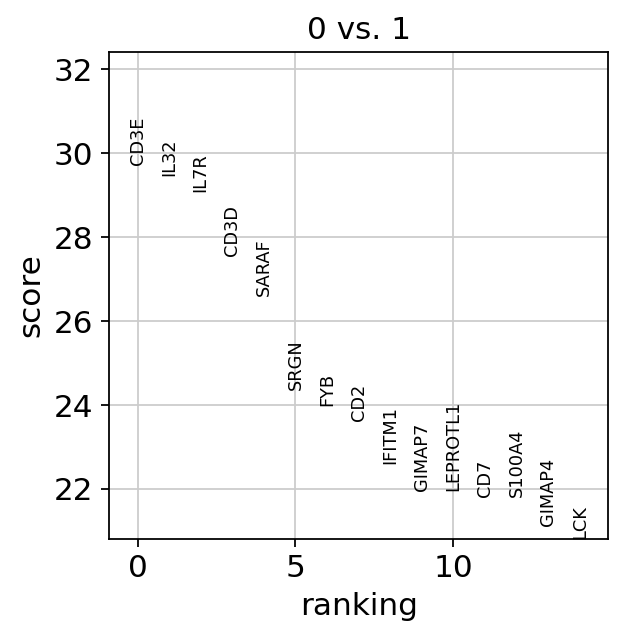

In [ ]:
#Use a single single cluster for comparaison.
sc.tl.rank_genes_groups(adata1, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata1, groups=['0'], n_genes=15)

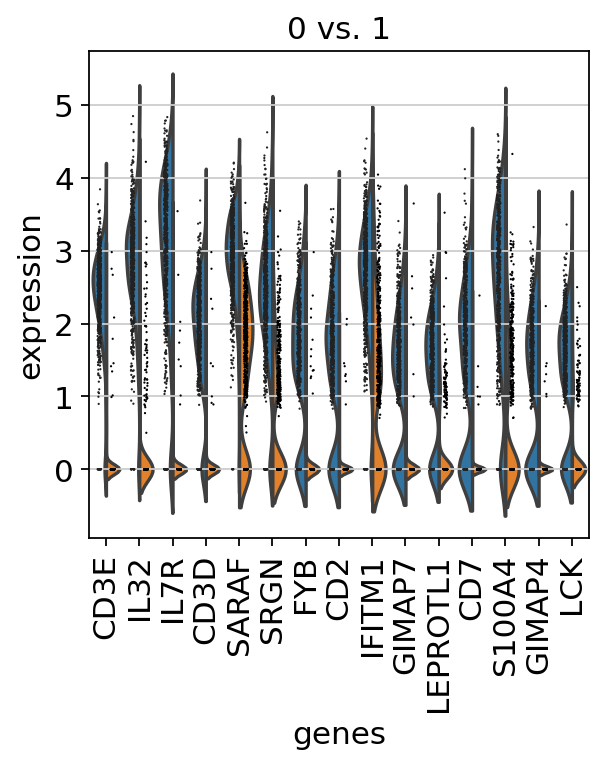

In [ ]:
#represent in violin for more detailed for a certain group
sc.pl.rank_genes_groups_violin(adata1, groups='0', n_genes=15)

**Explores differentially expressed genes between specific clusters.**

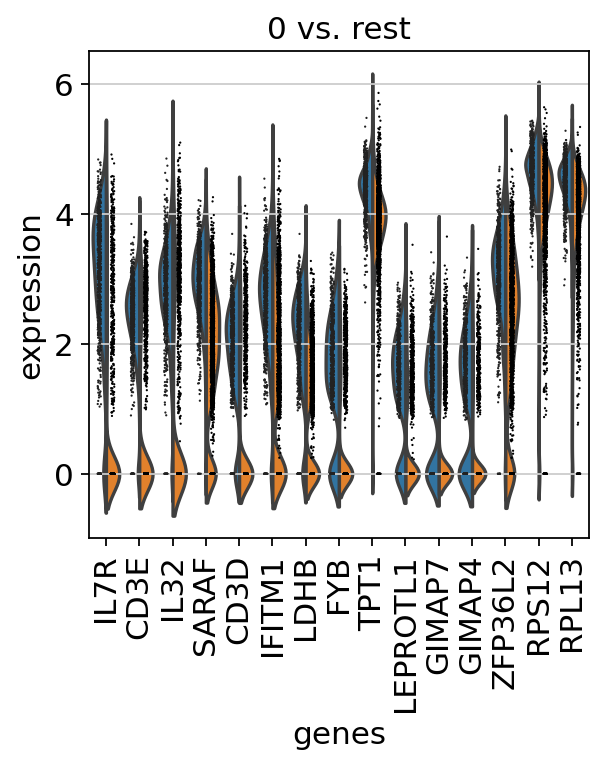

In [ ]:
#Reload the object that computed for differential expression then comparing 0 to the rest of the groups.
adata1 = sc.read(results_file)
sc.pl.rank_genes_groups_violin(adata1, groups='0', n_genes=15)

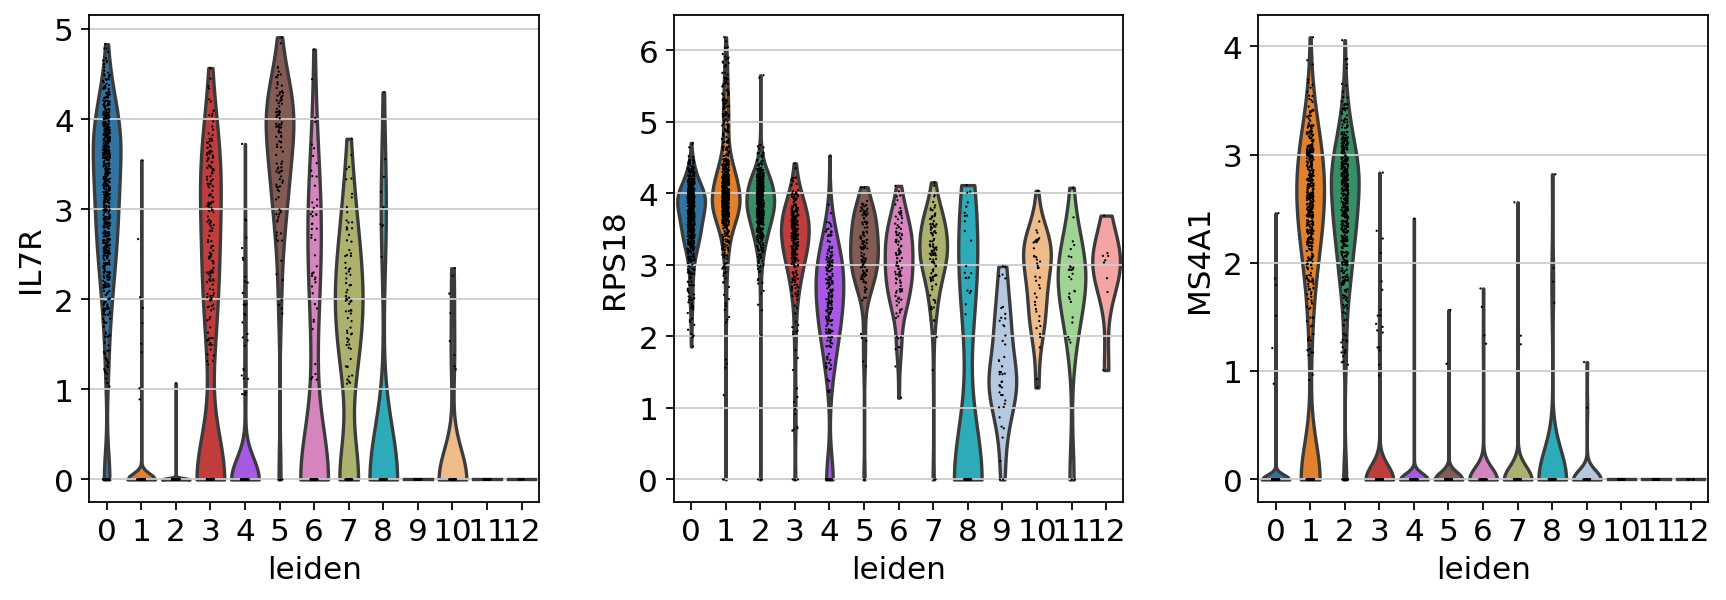

In [ ]:
#compare certain gene across groups
sc.pl.violin(adata1, ['IL7R','RPS18','MS4A1'], groupby='leiden')

In [ ]:
#how to  mark the cell types.
new_cluster_names = [ 'CD4 T', 'CD14 Monocytes','B', 'CD8 T', 'NK', 'FCGR3A Monocytes', 'Dendritic',
                     'Neutrophil','RBC','IgM PB','IgA PB','pDC'],
adata1.rename_categories('leiden', new_cluster_names)

In [ ]:
print(dadata1.m.cat.categories)